In [1]:
%matplotlib inline
import csv
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl

cmapp = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['blue','red'],256)
cmapp._init()
alphas = np.linspace(0, 0.8, cmapp.N+3)
cmapp._lut[:,-1] = alphas

In [3]:
datX = []
datL = []
with open('input/crimes.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for dat in reader:
        try:
            tim = datetime.datetime.strptime(dat[2], "%m/%d/%Y %I:%M:%S %p")
            lat = float(dat[19])
            lng = float(dat[20])
            datX.append([lat,lng,tim.hour,tim.weekday(),tim.month])
            datL.append([dat[5],dat[7]])
        except:
            pass
X = np.array(datX);
L = np.array(datL);

In [4]:
L[np.char.find(L[:,1],'AIR')>=0,1]='AIRPORT'
L[np.char.find(L[:,0],'NON')>=0,0]='NON-CRIMINAL'
L[np.char.find(L[:,1],'CTA')>=0,1]='CTA'

In [5]:
from collections import Counter

L0_h = Counter(L[:,0])
L0_l, L0_v = zip(*L0_h.items())
L0_l = np.array(L0_l)
L0_v = np.array(L0_v)
L0_i = np.arange(L0_l.size)

L0_s = np.argsort(L0_v)
L0_l = L0_l[L0_s]
L0_v = L0_v[L0_s]

L1_h = Counter(L[:,1])
L1_l, L1_v = zip(*L1_h.items())
L1_l = np.array(L1_l)
L1_v = np.array(L1_v)
L1_i = np.arange(L1_l.size)

L1_s = np.argsort(L1_v)
L1_l = L1_l[L1_s]
L1_v = L1_v[L1_s]

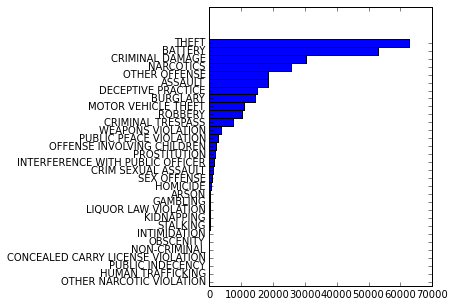

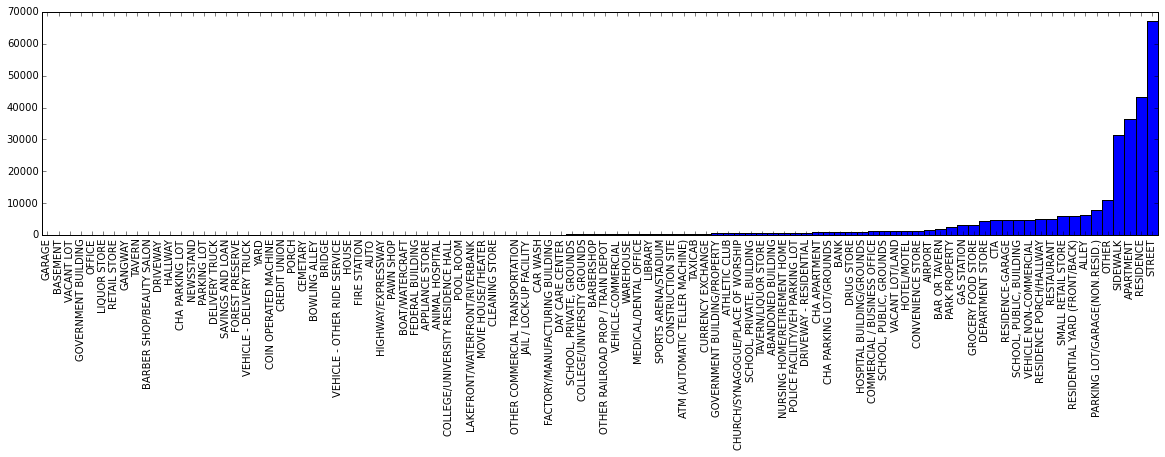

In [6]:
width = 1

fig = plt.figure(figsize=(4,5))
plt.barh(L0_i, L0_v, width)
plt.yticks(L0_i + width * 0.5, L0_l);


fig = plt.figure(figsize=(20,4))
plt.bar(L1_i, L1_v, width)
plt.xticks(L1_i + width * 0.5, L1_l,rotation='vertical');

In [12]:
L_h = np.zeros((L0_l.size,L1_l.size))
for l in L:
    i0 = np.where(L0_l==l[0]);
    i1 = np.where(L1_l==l[1]);
    L_h[i0,i1]=L_h[i0,i1]+1

In [13]:
L_h = L_h/np.sum(L_h,axis=0)[np.newaxis, :]

<matplotlib.colorbar.Colorbar instance at 0x7f1ff78a8c68>

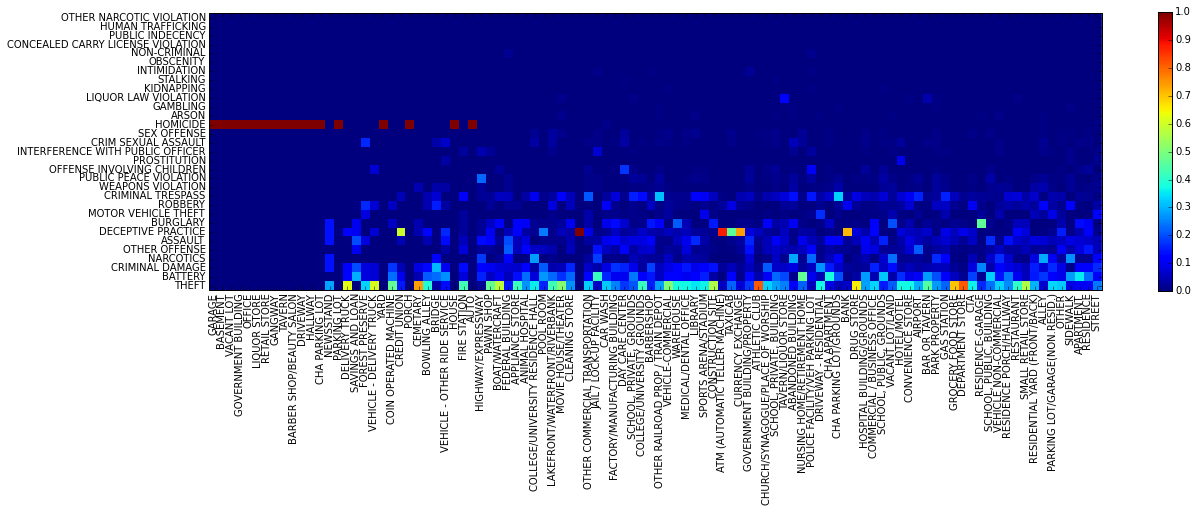

In [14]:
fig = plt.figure(figsize=(20,5))
plt.imshow(L_h, interpolation='none')
plt.xticks(range(len(L1_l)),L1_l,rotation='vertical');
plt.yticks(range(len(L0_l)),L0_l);
plt.colorbar()